<a href="https://colab.research.google.com/github/SachinBiswas7/Bangla-Emotion-Classification/blob/main/transformer_embeding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN


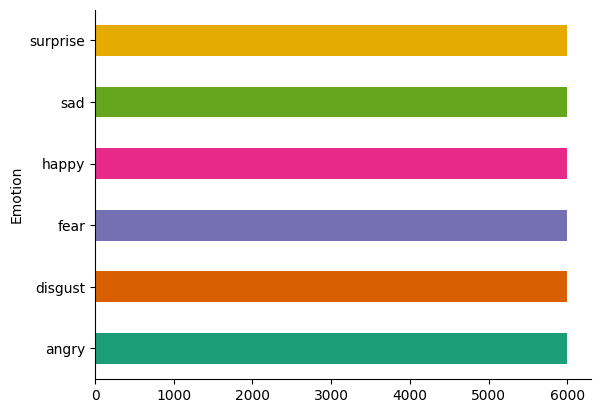

In [4]:
# @title Emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Emotion_label'] = le.fit_transform(df['Emotion'])


In [6]:
#drop Racial biases
df.drop(['Racial Biases'], axis=1, inplace=True)
#drop Hatred Percentage
df.drop(['Hatred Percentage',], axis=1, inplace=True)
#drop Depression Percentage
df.drop(['Depression Percentage'], axis=1, inplace=True)
#drop year
df.drop(['Year'], axis=1, inplace=True)


In [7]:
#data preprocessing using spacy

#removing unnecessary punctuation
import re

# Data cleaning function
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

df['Cleaned'] = df['Text'].apply(process_comments)
df.head()


,SL,Emotion,Text,Emotion_label,Cleaned
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...


In [8]:
import pandas as pd

# Load Bengali stop words from a CSV file
stop_words_df = pd.read_csv('stopwords_bangla.csv')  # Assuming the CSV has one column with stop words
stop_words_df=stop_words_df.drop(['Unnamed: 0'], axis=1)
# Convert the stop words to a list
stop_words_list = stop_words_df.iloc[:, 0].tolist()  # Convert the column to a list

# Check the stop words list
print("Stop words list:", stop_words_list[:10])  # Print first 10 stop words for verification


# Function to remove stop words
def remove_stop_words(text, stop_words):
    if isinstance(text, str):  # Ensure the text is a string
        # Tokenize text (simple split for Bengali)
        words = text.split()
        # Filter out stop words
        filtered_words = [word for word in words if word not in stop_words]
        # Join words back into a single string
        return ' '.join(filtered_words)
    else:
        return text  # If text is not a string, return it as is

# Assuming 'df' is the DataFrame and 'Cleaned' is the column with text data
# Check a few entries in the original DataFrame
print("Original texts:", df['Cleaned'].head())

# Apply the function to the DataFrame
df['filtered_text'] = df['Cleaned'].apply(lambda x: remove_stop_words(x, stop_words_list))


df.head()

Stop words list: ['অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ']
Original texts: 0    নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1    জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2                                     ভেজাল নির্বাচন  
3    বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4    সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল  এ...
Name: Cleaned, dtype: object


,SL,Emotion,Text,Emotion_label,Cleaned,filtered_text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভোট ব...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,জনগণ মনের আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,বিএনপি রাজাকার সমর্থকরা হেরে দেশের আমিও সন্তুষ...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...,সূক্ষ্ম কারচুপি এতদিন একটা কথার কথা বাস্তব রূপ...


In [9]:
!pip install --upgrade pip
!pip install --upgrade tensorflow torch transformers
!pip install tqdm



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
from tqdm import tqdm  # Import tqdm for progress bar

# Load dataset
data = df

# Ensure balanced dataset with up to 100 samples per emotion
data = data.groupby('Emotion').apply(lambda x: x.sample(n=min(len(x), 6000), random_state=42)).reset_index(drop=True)

# Split the dataset into features and labels
X = data['filtered_text']
y = data['Emotion']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformer models and tokenizers
models_and_tokenizers = {
    "bert-large-uncased": {
        "tokenizer": AutoTokenizer.from_pretrained("bert-large-uncased"),
        "model": AutoModel.from_pretrained("bert-large-uncased")
    },
    "banglabert": {
        "tokenizer": AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base"),
        "model": AutoModel.from_pretrained("sagorsarker/bangla-bert-base")
    },
    "xlm-roberta-large": {
        "tokenizer": AutoTokenizer.from_pretrained("xlm-roberta-large"),
        "model": AutoModel.from_pretrained("xlm-roberta-large")
    },
    "bangla-electra": {
        "tokenizer": AutoTokenizer.from_pretrained("monsoon-nlp/bangla-electra"),
        "model": AutoModel.from_pretrained("monsoon-nlp/bangla-electra")
    }
}

# Function to generate embeddings using transformer models
def generate_ensemble_embeddings(texts, models_and_tokenizers):
    all_embeddings = []
    for model_name, components in models_and_tokenizers.items():
        print(f"Generating embeddings with {model_name}...")
        tokenizer = components["tokenizer"]
        model = components["model"]
        embeddings = []
        for text in tqdm(texts, desc=f"Processing with {model_name}", ncols=100):
            encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=256)
            with torch.no_grad():
                model_output = model(**encoded_input)
            embedding = model_output.last_hidden_state.mean(dim=1).numpy()  # Mean pooling
            embeddings.append(embedding)
        all_embeddings.append(np.vstack(embeddings))
    return np.hstack(all_embeddings)

# Generate ensemble embeddings for training and test sets
print("Generating ensemble embeddings for training set...")
X_train_embeddings = generate_ensemble_embeddings(X_train.tolist(), models_and_tokenizers)

print("Generating ensemble embeddings for test set...")
X_test_embeddings = generate_ensemble_embeddings(X_test.tolist(), models_and_tokenizers)

# Define a PyTorch dataset class
class EmotionDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.tensor(embeddings, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

# Prepare DataLoader
batch_size = 32
train_dataset = EmotionDataset(X_train_embeddings, y_train)
test_dataset = EmotionDataset(X_test_embeddings, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple feed-forward neural network
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Model setup
input_dim = X_train_embeddings.shape[1]
num_classes = len(label_encoder.classes_)
classifier = Classifier(input_dim, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=1e-3)

# Training loop
def train_model(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for embeddings, labels in tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}", ncols=100):
            optimizer.zero_grad()
            outputs = model(embeddings)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1} Loss: {total_loss / len(dataloader):.4f}")

# Train the classifier
print("Training the classifier...")
train_model(classifier, train_loader, criterion, optimizer, epochs=10)

# Evaluation
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for embeddings, labels in dataloader:
            outputs = model(embeddings)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

print("Evaluating the classifier...")
y_pred, y_true = evaluate_model(classifier, test_loader)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))


<ipython-input-10-2545f9bfbcef>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Emotion').apply(lambda x: x.sample(n=min(len(x), 6000), random_state=42)).reset_index(drop=True)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  wa

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/391 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/492k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/53.9M [00:00<?, ?B/s]

Generating ensemble embeddings for training set...
Generating embeddings with bert-large-uncased...


Processing with bert-large-uncased:   0%|                      | 6/28800 [00:09<12:58:07,  1.62s/it]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-2545f9bfbcef>", line 69, in <cell line: 0>
    X_train_embeddings = generate_ensemble_embeddings(X_train.tolist(), models_and_tokenizers)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-10-2545f9bfbcef>", line 61, in generate_ensemble_embeddings
    model_output = model(**encoded_input)
                   ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^

TypeError: object of type 'NoneType' has no len()

In [ ]:
# Cell 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm  # Import tqdm for progress bar
import joblib  # For saving and loading embeddings
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Cell 2: Load and preprocess dataset
data = df

# Ensure balanced dataset with up to 100 samples per emotion
data = data.groupby('Emotion').apply(lambda x: x.sample(n=min(len(x), 6000), random_state=42)).reset_index(drop=True)

# Split the dataset into features and labels
X = data['filtered_text']
y = data['Emotion']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Cell 3: Define transformer models and tokenizers
models_and_tokenizers = {
    "bert-large-uncased": {
        "tokenizer": AutoTokenizer.from_pretrained("bert-large-uncased"),
        "model": AutoModel.from_pretrained("bert-large-uncased")
    },
    "banglabert": {
        "tokenizer": AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base"),
        "model": AutoModel.from_pretrained("sagorsarker/bangla-bert-base")
    },
    "xlm-roberta-large": {
        "tokenizer": AutoTokenizer.from_pretrained("xlm-roberta-large"),
        "model": AutoModel.from_pretrained("xlm-roberta-large")
    },
    "bangla-electra": {
        "tokenizer": AutoTokenizer.from_pretrained("monsoon-nlp/bangla-electra"),
        "model": AutoModel.from_pretrained("monsoon-nlp/bangla-electra")
    }
}

In [12]:
# Cell 4: Function to generate and save embeddings using transformer models
def generate_and_save_embeddings(texts, models_and_tokenizers, output_dir):
    for model_name, components in models_and_tokenizers.items():
        print(f"Generating embeddings with {model_name}...")
        tokenizer = components["tokenizer"]
        model = components["model"]
        embeddings = []
        for text in tqdm(texts, desc=f"Processing with {model_name}", ncols=100):
            encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=256)
            with torch.no_grad():
                model_output = model(**encoded_input)
            embedding = model_output.last_hidden_state.mean(dim=1).numpy()  # Mean pooling
            embeddings.append(embedding)
        embeddings = np.vstack(embeddings)
        file_path = f"{output_dir}/{model_name}_embeddings.pkl"
        joblib.dump(embeddings, file_path)
        print(f"Saved embeddings for {model_name} to {file_path}")


In [14]:
# Cell 5: Generate and save embeddings
output_dir = "embeddings"
os.makedirs(output_dir, exist_ok=True)

print("Generating and saving embeddings for training set...")
generate_and_save_embeddings(X_train.tolist(), models_and_tokenizers, output_dir)

print("Generating and saving embeddings for test set...")
generate_and_save_embeddings(X_test.tolist(), models_and_tokenizers, output_dir)


NameError: name 'os' is not defined

In [ ]:
# Cell 6: Function to load and combine embeddings
def load_and_combine_embeddings(model_names, output_dir):
    combined_embeddings = []
    for model_name in model_names:
        file_path = f"{output_dir}/{model_name}_embeddings.pkl"
        embeddings = joblib.load(file_path)
        combined_embeddings.append(embeddings)
    return np.hstack(combined_embeddings)

In [ ]:
# Cell 7: Load and combine embeddings for ensemble
print("Loading and combining embeddings for training set...")
model_names = list(models_and_tokenizers.keys())
X_train_embeddings = load_and_combine_embeddings(model_names, output_dir)

print("Loading and combining embeddings for test set...")
X_test_embeddings = load_and_combine_embeddings(model_names, output_dir)

In [ ]:
# Cell 8: Define PyTorch dataset class
class EmotionDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.tensor(embeddings, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]


In [ ]:
# Cell 9: Prepare DataLoader
batch_size = 32
train_dataset = EmotionDataset(X_train_embeddings, y_train)
test_dataset = EmotionDataset(X_test_embeddings, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Cell 10: Define a simple feed-forward neural network
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
# Cell 11: Model setup
input_dim = X_train_embeddings.shape[1]
num_classes = len(label_encoder.classes_)
classifier = Classifier(input_dim, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=1e-3)

In [ ]:
# Cell 12: Training loop
def train_model(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for embeddings, labels in tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}", ncols=100):
            optimizer.zero_grad()
            outputs = model(embeddings)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1} Loss: {total_loss / len(dataloader):.4f}")

In [ ]:
# Cell 13: Train the classifier
print("Training the classifier...")
train_model(classifier, train_loader, criterion, optimizer, epochs=10)


In [ ]:
# Cell 14: Evaluation
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for embeddings, labels in dataloader:
            outputs = model(embeddings)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

print("Evaluating the classifier...")
y_pred, y_true = evaluate_model(classifier, test_loader)

In [ ]:
# Cell 15: Evaluate the model
print("Classification Report:")
print(classification_report(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))
